In [30]:
import numpy
import matplotlib.pyplot
import matplotlib.pyplot as plt
import cv2

In [31]:
def calculate_gradient(img, template):
    ts = template.size #Number of elements in the template (3).
    #New padded array to hold the resultant gradient image.
    new_img = numpy.zeros((img.shape[0]+ts-1, 
                           img.shape[1]+ts-1))
    new_img[numpy.uint16((ts-1)/2.0):img.shape[0]+numpy.uint16((ts-1)/2.0), 
            numpy.uint16((ts-1)/2.0):img.shape[1]+numpy.uint16((ts-1)/2.0)] = img
    result = numpy.zeros((new_img.shape))
    
    for r in numpy.uint16(numpy.arange((ts-1)/2.0, img.shape[0]+(ts-1)/2.0)):
        for c in numpy.uint16(numpy.arange((ts-1)/2.0, 
                              img.shape[1]+(ts-1)/2.0)):
            curr_region = new_img[r-numpy.uint16((ts-1)/2.0):r+numpy.uint16((ts-1)/2.0)+1, 
                                  c-numpy.uint16((ts-1)/2.0):c+numpy.uint16((ts-1)/2.0)+1]
            curr_result = curr_region * template
            score = numpy.sum(curr_result)
            result[r, c] = score
    #Result of the same size as the original image after removing the padding.
    result_img = result[numpy.uint16((ts-1)/2.0):result.shape[0]-numpy.uint16((ts-1)/2.0), 
                        numpy.uint16((ts-1)/2.0):result.shape[1]-numpy.uint16((ts-1)/2.0)]
    return result_img

In [32]:
def gradient_magnitude(horizontal_gradient, vertical_gradient):
    horizontal_gradient_square = numpy.power(horizontal_gradient, 2)
    vertical_gradient_square = numpy.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = numpy.sqrt(sum_squares)
    return grad_magnitude

In [33]:
def gradient_direction(horizontal_gradient, vertical_gradient):
    grad_direction = numpy.arctan(vertical_gradient/(horizontal_gradient+0.00000001))
    grad_direction = numpy.rad2deg(grad_direction)
    grad_direction = grad_direction%180
    return grad_direction

In [34]:
def HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins):
    HOG_cell_hist = numpy.zeros(shape=(hist_bins.size))
    cell_size = cell_direction.shape[0]
    
    for row_idx in range(cell_size):
        for col_idx in range(cell_size):
            curr_direction = cell_direction[row_idx, col_idx]
            curr_magnitude = cell_magnitude[row_idx, col_idx]
    
            diff = numpy.abs(curr_direction - hist_bins)
            
            if curr_direction < hist_bins[0]:
                first_bin_idx = 0
                second_bin_idx = hist_bins.size-1
            elif curr_direction > hist_bins[-1]:
                first_bin_idx = hist_bins.size-1
                second_bin_idx = 0
            else:
                first_bin_idx = numpy.where(diff == numpy.min(diff))[0][0]
                temp = hist_bins[[(first_bin_idx-1)%hist_bins.size, (first_bin_idx+1)%hist_bins.size]]
                temp2 = numpy.abs(curr_direction - temp)
                res = numpy.where(temp2 == numpy.min(temp2))[0][0]
                if res == 0 and first_bin_idx != 0:
                    second_bin_idx = first_bin_idx-1
                else:
                    second_bin_idx = first_bin_idx+1
            
            first_bin_value = hist_bins[first_bin_idx]
            second_bin_value = hist_bins[second_bin_idx]
            HOG_cell_hist[first_bin_idx] = HOG_cell_hist[first_bin_idx] + (numpy.abs(curr_direction - first_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
            HOG_cell_hist[second_bin_idx] = HOG_cell_hist[second_bin_idx] + (numpy.abs(curr_direction - second_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
    return HOG_cell_hist

In [54]:
img = cv2.imread("cat.jpg",0) #cv2.resize(,(64,128))

In [55]:
def plot_img(im, h=8, **kwargs):
  # Copied from internet to make life a bit easier
    
  y = im.shape[0]
  x = im.shape[1]
  w = (y/x) * h
  plt.figure(figsize=(w,h))
  plt.imshow(im, interpolation="none", **kwargs)
  plt.axis('off')

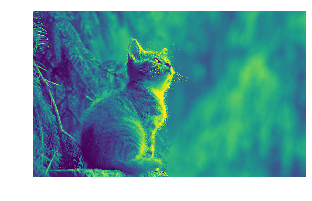

In [56]:
plot_img(img)

In [57]:
horizontal_mask = numpy.array([-1, 0, 1])
vertical_mask = numpy.array([[-1],
                             [0],
                             [1]])

In [58]:
horizontal_gradient = calculate_gradient(img, horizontal_mask)
vertical_gradient = calculate_gradient(img, vertical_mask)

In [64]:
grad_direction = grad_direction % 180
hist_bins = numpy.array([10,30,50,70,90,110,130,150,170])

NameError: name 'grad_direction' is not defined

In [63]:
cell_direction = grad_direction[:8, :8]
cell_magnitude = grad_magnitude[:8, :8]
HOG_cell_hist = HOG.HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)


NameError: name 'grad_direction' is not defined